In [ ]:
#install and import packages
!pip install simpletransformers
!pip install hdbscan
!pip install umap-learn
!pip install hanziconv

     |████████████████████████████████| 248 kB 5.1 MB/s 
     |████████████████████████████████| 6.8 MB 27.4 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 1.2 MB 64.2 MB/s 
     |████████████████████████████████| 3.4 MB 71.0 MB/s 
     |████████████████████████████████| 1.7 MB 60.1 MB/s 
     |████████████████████████████████| 9.3 MB 57.3 MB/s 
     |████████████████████████████████| 311 kB 97.7 MB/s 
     |████████████████████████████████| 67 kB 6.5 MB/s 
     |████████████████████████████████| 596 kB 71.3 MB/s 
     |████████████████████████████████| 3.3 MB 58.9 MB/s 
     |████████████████████████████████| 895 kB 70.4 MB/s 
     |████████████████████████████████| 143 kB 71.8 MB/s 
     |████████████████████████████████| 97 kB 5.8 MB/s 
     |████████████████████████████████| 180 kB 69.9 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 243 kB 88.6 MB/s 
     |█████████████████

     |████████████████████████████████| 6.4 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311970 sha256=0a3d9839ce2c8b39339cdbbd3969c0c24bef0b102f29f163bdbf5e127729b707
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan
     |████████████████████████████████| 86 kB 3.7 MB/s 
     |████████████████████████████████| 1.1 MB 10.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=cc5687f703a11c45ab91f600134332a7abb509e5dec32d70ba3bca4798a3822d
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=d8d1b7812c8114725e893d80d16641acd76ed9ef806

# 匯入資料(字體、字典、表格、圖片)

In [ ]:
import gdown
import pandas as pd
import os
!gdown --id '1oiRifKBUnO52YbNJNDPpsOSWuoFj9VyF' --output msjh.ttf
!gdown --id '1JXv0j0-L1Ac1_U28aLeIHSf0rzu-SVgN' --output 方正清刻本悦宋简体.ttf
!gdown --id '1IY8SqaCP5hJhLbCTmHNAG6WcYA8_-Sz9' --output Black_Circle.jpg
!gdown --id '1w2BL4BKiK7dLrsB9ByWu16ho8ckgohuJ' --output userdict.txt
!gdown --id '1A3ne3AeSbI9y1HJoIYkWmFBc5tcd-Dgc' --output stopwords_zh-tw.txt
!gdown --id '1FHsZ7ZzsIg5ufBjrNjUi5UfOL2tisBaK' --output data.zip
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!unzip 'data.zip'

import os
file_list = []
for filename in os.listdir("data"):
  file_list.append(filename)



Downloading...
From: https://drive.google.com/uc?id=1oiRifKBUnO52YbNJNDPpsOSWuoFj9VyF
To: /content/msjh.ttf
100% 21.7M/21.7M [00:00<00:00, 82.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JXv0j0-L1Ac1_U28aLeIHSf0rzu-SVgN
To: /content/方正清刻本悦宋简体.ttf
100% 3.15M/3.15M [00:00<00:00, 101MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IY8SqaCP5hJhLbCTmHNAG6WcYA8_-Sz9
To: /content/Black_Circle.jpg
100% 14.7k/14.7k [00:00<00:00, 13.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1w2BL4BKiK7dLrsB9ByWu16ho8ckgohuJ
To: /content/userdict.txt
100% 14.4M/14.4M [00:00<00:00, 45.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A3ne3AeSbI9y1HJoIYkWmFBc5tcd-Dgc
To: /content/stopwords_zh-tw.txt
100% 8.12k/8.12k [00:00<00:00, 17.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FHsZ7ZzsIg5ufBjrNjUi5UfOL2tisBaK
To: /content/data.zip
100% 410M/410M [00:04<00:00, 91.6MB/s]
--2022-01-26 06:34:32--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp

## 合併研究範圍的表格 (大躍進期間 1958-1962)

In [ ]:
df0 = pd.read_excel('data/'+'1958_jieba.xlsx')
df1 = pd.read_excel('data/'+'1959_jieba.xlsx')
df2 = pd.read_excel('data/'+'1960_jieba.xlsx')
df3 = pd.read_excel('data/'+'1961_jieba.xlsx')
df4 = pd.read_excel('data/'+'1962_jieba.xlsx')
df = pd.concat([df0, df1, df2, df3, df4],axis=0, ignore_index=True)

df = df.dropna(subset=["title",'doc_content','tfidf']) #去除遺漏值
print(f'資料量：　{len(df)}')

資料量：　112484


# 設定模型參數

In [ ]:
from simpletransformers.language_representation import RepresentationModel
from simpletransformers.config.model_args import ModelArgs


# https://huggingface.co/models  --當前可用的Pre-Trained models

model_args = ModelArgs(max_seq_length=156)
model = RepresentationModel('bert', 'bert-base-chinese', 
                            args=model_args, 
                            use_cuda=True)

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/393M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForTextRepresentation: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/107k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/263k [00:00<?, ?B/s]

# Transformer encode sentences (需要時間)

In [ ]:
# Covert word vectors to sentence vectors by the mean of word vectors
embeddings = model.encode_sentences(df['tfidf'], combine_strategy="mean")
print(embeddings.shape)

(112484, 768)


# 降維

In [ ]:
import umap
import hdbscan

# 降維可以選擇截尾svd 或 tsne 但不能使用pca，因為pca不能處理稀疏矩陣
umap_embeddings = umap.UMAP(n_neighbors=30, #越大代表考慮的範圍越大，較能顧及全部區域
                            n_components=50, 
                            metric='cosine',
                            random_state=42
                            ).fit_transform(embeddings)






/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


# 分群

In [ ]:
# https://axk51013.medium.com/2021%E5%B9%B4%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%E5%AE%B6%E5%BF%85%E5%82%99%E5%88%86%E7%BE%A4%E6%B3%95hdbscan%E7%B0%A1%E4%BB%8B-fba8287e666c
# https://axk51013.medium.com/%E4%B8%8D%E8%A6%81%E5%86%8D%E7%94%A8k-means-%E8%B6%85%E5%AF%A6%E7%94%A8%E5%88%86%E7%BE%A4%E6%B3%95dbscan%E8%A9%B3%E8%A7%A3-a33fa287c0e

cluster = hdbscan.HDBSCAN(min_cluster_size=71, # 一個群集至少要包含幾個
                          metric='euclidean',                      
                          cluster_selection_method='eom',
                          core_dist_n_jobs=1 
                          ).fit(umap_embeddings)
                          
# best performers

# n_components=20
# min_cluster_size=40 

# best performers
# n_components=50
# n_neighbors=10
  # min_cluster_size=40 >>143
  # min_cluster_size=45 >>121
  # min_cluster_size=50 >>117
  # min_cluster_size=55 >>90
  # min_cluster_size=65 >>89
  # min_cluster_size=70 >>81
  # min_cluster_size=75 >>82
  # min_cluster_size=81 >>72

# best performers
# n_components=50
# n_neighbors=30
  # min_cluster_size=70 >>68 # -1: 51929
  # min_cluster_size=71 >>57 # -1: 46117
 


## 分群結果標籤匯入表格

In [ ]:
from collections import Counter
df['cluster'] = list(cluster.labels_)

a = len(Counter(df['cluster']))

print(Counter(df['cluster']))

print(f'cluster number:{a}')


Counter({-1: 46117, 13: 10357, 46: 7169, 7: 5745, 34: 5452, 32: 5043, 54: 2795, 25: 2393, 47: 2388, 40: 2165, 52: 2147, 11: 2114, 16: 1953, 27: 1881, 37: 1399, 23: 1235, 14: 1114, 53: 1074, 33: 1050, 43: 911, 45: 552, 50: 552, 18: 462, 21: 447, 17: 433, 28: 420, 4: 354, 49: 350, 31: 298, 20: 285, 41: 248, 30: 247, 42: 238, 39: 237, 12: 219, 51: 187, 8: 177, 10: 168, 22: 166, 44: 165, 38: 161, 3: 149, 29: 136, 2: 126, 26: 125, 0: 112, 55: 112, 35: 106, 9: 101, 48: 95, 15: 92, 6: 85, 5: 78, 19: 77, 36: 75, 24: 75, 1: 72})
cluster number:57


# 降成2維，繪圖查看分群結果

In [ ]:
import matplotlib.pyplot as plt

# umap降維 https://zhuanlan.zhihu.com/p/109584077
umap_data = umap.UMAP(n_neighbors=100, n_components=2, min_dist=0, metric='cosine', random_state=42).fit_transform(embeddings)


result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_



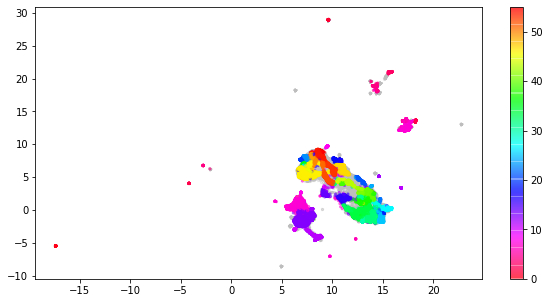

In [ ]:
# Visualize clusters
fig, ax = plt.subplots(figsize=(10, 5))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]

plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=5, alpha=0.3)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=5, alpha=0.5, cmap='hsv_r')
plt.colorbar()

# 列出詞頻，定義群集概念

In [ ]:
from hanziconv import HanziConv
import jieba
jieba.load_userdict("userdict.txt")

df['tokenized'] = [list(jieba.cut(text)) for text in df['title']] ##

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.808 seconds.
Prefix dict has been built successfully.


## 字詞清理：標點符號、刪除停用詞

In [ ]:
import unicodedata # for removing Chinese puctuation

def remove_stopWords(words): # 刪除停用詞
    with open("stopwords_zh-tw.txt", encoding="utf-8") as fin:
        stopwords = fin.read().split("\n")[1:]
    out = []
    for word in words:
        if word not in stopwords:
            out.append(word)
    return out


def remove_punc_by_unicode(words): # 刪除標點符號
    out = []
    for word in words:
        if word != " " and not unicodedata.category(word[0]).startswith('P'):
            out.append(word)
    return out
    
df['cleaned'] = df['tokenized'].apply(remove_punc_by_unicode).apply(remove_stopWords)

## 印出個群集關鍵字

In [ ]:
from collections import defaultdict, Counter


clu_counter = Counter(df['cluster'])
cdict = defaultdict(Counter)
for k, v in zip(df['cluster'], df['cleaned']):
    for word in v:
        cdict[k][word] += 1
for c in cdict:
    print("-"*80)
    print("Cluster", c, "has", clu_counter[c], "members")
    print(cdict[c].most_common(20))



--------------------------------------------------------------------------------
Cluster -1 has 46117 members
[('美国', 2133), ('举行', 1731), ('生产', 1501), ('代表团', 1483), ('苏联', 1199), ('公社', 1151), ('古巴', 1000), ('我国', 950), ('中国', 938), ('斗争', 937), ('中', 823), ('工作', 823), ('加强', 770), ('农业', 741), ('庆祝', 731), ('朝鲜', 703), ('越南', 695), ('发展', 687), ('北京', 667), ('支持', 665)]
--------------------------------------------------------------------------------
Cluster 7 has 5745 members
[('公社', 248), ('社员', 225), ('生产', 220), ('这是', 214), ('正在', 174), ('工人', 113), ('中', 110), ('生产队', 110), ('苏联', 107), ('新', 106), ('今年', 104), ('人民公社', 103), ('图为', 102), ('大队', 95), ('好', 88), ('日', 85), ('农业', 81), ('一个', 80), ('厂', 79), ('工作', 77)]
--------------------------------------------------------------------------------
Cluster 32 has 5043 members
[('美国', 1550), ('苏联', 568), ('印度', 542), ('侵略', 318), ('问题', 290), ('中国', 281), ('我国', 281), ('会议', 275), ('政府', 265), ('报纸', 263), ('裁军', 254), ('西德', 2

## 以表格方式識別群集概念

In [ ]:
Cluster_items = [] # 儲存所有群集的內容


Cluster_list = [i for i in cdict] # 儲存群集


for i in Cluster_list:
  Cluster_items_word = [] # 儲存各別群集的文字
  Cluster_word_common = [] # 儲存各別群集的文字頻率
  for j in cdict[i].most_common(50):
    Cluster_items_word.append(j[0])
  Cluster_items.append(Cluster_items_word)


Cluster_word_dict = dict(zip(Cluster_list, Cluster_items))


wrd_dict = [] # 以字典紀錄詞頻
for i in cdict:
  wrd_dict.append(dict((x, y) for x, y in cdict[i].most_common(50)))
 


df1 = pd.DataFrame(Cluster_word_dict)
df1.to_excel('data_cluster.xlsx')
df1

,-1,7,32,13,14,34,30,16,37,52,47,0,17,4,46,31,40,49,23,48,45,18,25,43,6,53,54,21,50,11,20,27,55,10,36,26,33,44,3,42,51,41,15,39,8,29,19,24,28,2,38,1,12,5,9,35,22
0,美国,公社,美国,代表团,苏联,古巴,印度尼西亚,苏联,共产党,外一首,学习,主席,中医,这是,生产,赫鲁晓夫,代表团,造林,养猪,铁路,运输,卫生,老挝,演出,这是,干部,增产,西藏,工程,比赛,捕鱼,日本,防治,举行,原料,木材,美国,札记,这是,演出,生产,展览会,苏联,艺术,台风,南朝鲜,朝中,名单,朝鲜,公社,朝鲜,周恩来总理,严重警告,公社,登山,美国,华侨
1,举行,社员,苏联,接见,宇宙,美国,西,计划,祝贺,之歌,教学,刘少奇,医学,正在,增产,苏联,周总理,营造,公社,大桥,铁路,除四害,美国,艺术,正在,生产,小麦,班禅额尔德尼,水利工程,举行,渔民,斗争,病虫害,会议,野生植物,林区,经济,读,社员,举行,社员,举行,培养,美术,警报,示威,美方,治丧委员会,美国,社员,代表团,日,提出,社员,登山队,美共,印度尼西亚
2,生产,生产,印度,到京,科学家,斗争,伊里安,今年,庆祝,二首,培养,周恩来总理,医院,社员,上海,代表团,访问,林业,牲畜,黄河,物资,工作,越南,戏曲,公社,公社,公社,拉萨,水库,全国,捕捞,反对,消灭,人大常委会,综合利用,黑龙江,印度,诗话,正在,苏联,公社,参观,学校,作品,大风,斗争,方面,同志,南朝鲜,这是,平壤,接见,侵入,这是,英雄,迫害,归侨
3,代表团,这是,侵略,回国,火箭,刚果,苏加诺,农业,阿尔巴尼亚,新,教育,图为,祖国,公社,提高,签订,举行,林场,发展,施工,效率,运动,南越,演员,生产队,群众,早稻,举行,防汛,锦标赛,鱼苗,条约,小麦,批准,增产,大兴安岭,经济危机,书话,上海,首次,干部,开幕,教育事业,展出,地区,集团,抗议,委员,朝鲜人民,生产队,金日成,图为,次,正在,珠穆朗玛峰,当局,祖国
4,苏联,正在,问题,美国,发射,支持,荷兰,工业,同志,公社,学校,贵宾,学习,生产,支援,莫斯科,陈毅,植树,内蒙古,动工,装卸,消灭,集团,剧目,社员,领导,管理,班禅,灌溉,全国纪录,水产,岸信,虫害,报告,生产,生产,日本,诗,工人,歌舞团,群众,中国,生产,展览,降雨,反对,朝鲜,委员会,支持,图为,中朝,陈毅,领空,大队,登上,黑人,侨胞
5,公社,工人,中国,举行,飞行,反对,叛军,生产,苏联,外,生产,日,西医,工人,钢铁,访问,副总理,绿化,繁殖,建成,提高,开展,会议,新,生产,工作,播种,叛乱,黄河,男子,福建,美国,丰收,主席,加工,坑木,危机,出版,公社,在京,大队,庆祝,加强,画家,喜雨,学生,美国,中国,中朝,正在,志愿军,副总理,领海,图为,日记,美,回国
6,古巴,中,我国,访问,宇宙飞船,阿尔及利亚,叛乱,增加,周年,北京,教师,代表团,研究,图为,职工,两国,主席,积极,配种,路,汽车,防治,干涉,传统,山东,深入,大队,会议,水利,选手,渔汛,政府,水稻,国务院,提高,采伐,英国,鲁迅,图为,音乐家,好,中国馆,干部,新,北方,汉城,停战,主任委员,斗争,广东,首相,大使,第1,代表团,最高峰,抗议,西爪哇
7,我国,生产队,会议,古巴,美国,谴责,美国,阿尔巴尼亚,讲话,诗,学生,左起,上海,大队,煤矿,议定书,中,果树,生产,兴建,组织,血吸虫病,爱国,谈,北京,社员,高产,国务院,整修,乒乓球,鱼,介,病虫,条约,油脂,集运,下降,随园,日,接见,记,我国,学生,展览会,部分地区,李承晚,委员会,主席团,讲话,大队,友谊,中国,我国,生产队,运动员,共产党,当局
8,中国,苏联,政府,我国,科学,拉丁美洲,印度尼西亚政府,波兰,代表大会,古巴,提高,握手,中西医,生产队,计划,会谈,缅,发展,大队,兰青,保证,突击,日内瓦,上海,工人,大队,亩产,西藏自治区,用水,结束,淡水,日美,除治,听取,食糖,支援,增加,全集,陈毅,副总理,农民,博览会,教育,首都,降温,朝鲜,南朝鲜,秘书长,撤出,人民公社,党政,代表团,军用飞机,人民公社,我国,种族歧视,归国华侨
9,斗争,新,报纸,苏联,月球,侵略,收复,超额完成,举行,颂,劳动,首都,医疗,中,设备,党政,接见,林木,耕畜,通车,车辆,爱国卫生运动,谴责,曲艺,生产大队,生产队,丰收,筹委会,蓄水,运动员,春汛,日共,积极,次,利用,抓紧,美,集,大队,艺术家,劳动,友谊,联系,画展,华北,要求,军事,友好,平壤,代表,访问,驻,美国,日,祝贺,温斯顿,迫害


# 匯入各群集關鍵字表格

## 文字雲圖

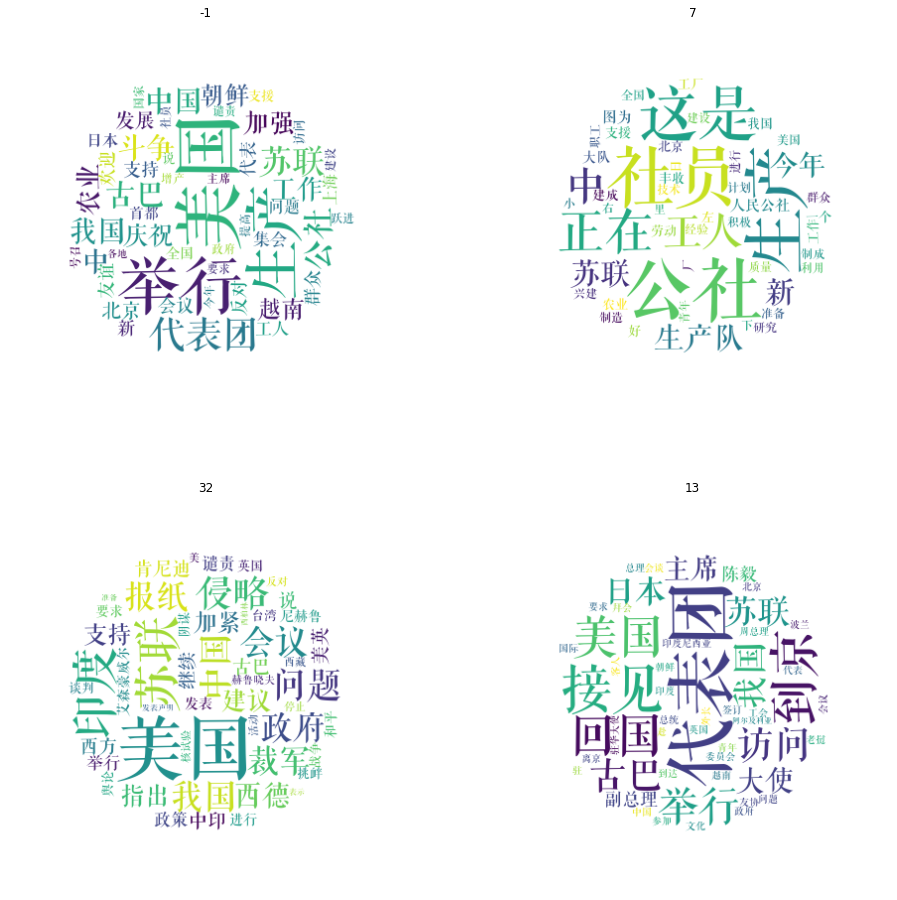

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
from wordcloud import WordCloud, STOPWORDS  
import numpy as np


# 圖形共有二列，每列二個，圖形大小設定
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,16))

# 變數
title=list(df1.columns)
BKImg=np.array(Image.open("Black_Circle.jpg"))   #  mask = BKImg, 
fp='方正清刻本悦宋简体.ttf'
i=0
for n in range(2):
    for m in range(2):
        wordcloud = WordCloud(font_path=fp,max_font_size=70, min_font_size = 5
                              ,background_color="white",margin=1,mask = BKImg,width=1000,height=1000, max_words=1000)   
        wordcloud = wordcloud.generate_from_frequencies(wrd_dict[i])  
        ax[n,m].imshow(wordcloud, interpolation='bilinear')
        ax[n,m].axis("off") 
        ax[n,m].set_title(title[i])
        i+=1
plt.show()

# 時間轉換為datetime格式
轉成datetime可以方便繪圖

In [ ]:
# 時間轉換為datetime格式

import datetime
def To_datetime(x):
  date = x
  date_form = []

  for i in date:    
      i = str(i)[:4]+'-'+str(i)[4:]
      date_form.append(i)


  dates = [datetime.datetime.strptime(x, '%Y-%m') for x in date_form]
  return dates
df = df.sort_values("era", ascending='True')
df1 = df


# 將日資料合併成月資料
* 列出每個群集的文章數
* 以人工識別，將相同概念群集進行合併合併概念後可以繪製折線圖，以月為單位

In [ ]:
era_list = set([i for i in df['era']])
cluster_month = []
era_month = []
k = 0
for e in era_list:
  cluster_temp = []
  for i,j in zip(df['cluster'], df['era']):
    if j == e:
      cluster_temp.append(i)
    else:
      pass
  cluster_month.append(cluster_temp)
  era_month.append(e)
      

In [ ]:
from collections import Counter

cluster_month_dict_list = [] # 每月群集個別數量，以字典表達，用list包覆

for i in range(len(cluster_month)):
  cluster_month_dict_list.append((dict(Counter(cluster_month[i]))))

df_cluster_month = pd.DataFrame(cluster_month_dict_list) 
df_era_month = pd.DataFrame(To_datetime(era_month), columns=['month'])

df_month = pd.concat([df_era_month, df_cluster_month], axis=1) # 水平合併
df_month = df_month.sort_values("month", ascending='True').reset_index().fillna(0)  # 以月分遞增排序  重設index  以0填滿NAN
df_month = df_month.drop(columns=['index']) #刪除原本的inex
df_month

,month,32,34,25,27,40,13,37,-1,52,7,2,53,46,4,23,55,29,3,42,16,54,47,28,45,11,26,14,17,20,21,33,35,18,51,15,43,39,5,10,8,44,41,50,19,1,49,31,12,6,9,0,30,38,22,24,36,48
0,1958-01-01,117,58,2,13,38,202,17.0,1124,26,153,0.0,39,83,10,8,1.0,1.0,4.0,2.0,57,20,81,0.0,3.0,19,1.0,41.0,8.0,3.0,10.0,22,0.0,69.0,2.0,1.0,12,2.0,0.0,5.0,4.0,3.0,2.0,13.0,1.0,0.0,13.0,6.0,0.0,3.0,0.0,1.0,10.0,0.0,0.0,0.0,6.0,9.0
1,1958-02-01,72,38,1,9,9,155,21.0,963,27,104,3.0,24,64,3,13,2.0,1.0,2.0,1.0,24,19,77,38.0,5.0,21,0.0,28.0,7.0,1.0,10.0,18,0.0,40.0,3.0,0.0,14,3.0,0.0,7.0,2.0,1.0,0.0,13.0,5.0,0.0,11.0,0.0,0.0,2.0,0.0,2.0,20.0,11.0,0.0,4.0,0.0,2.0
2,1958-03-01,78,44,13,26,12,186,13.0,1263,31,291,0.0,60,92,4,19,0.0,0.0,2.0,8.0,44,42,100,9.0,5.0,28,0.0,33.0,14.0,2.0,7.0,41,0.0,22.0,0.0,1.0,25,6.0,0.0,2.0,6.0,3.0,3.0,31.0,4.0,1.0,9.0,5.0,1.0,7.0,0.0,0.0,24.0,11.0,0.0,8.0,4.0,0.0
3,1958-04-01,84,58,7,34,18,203,33.0,1234,35,230,1.0,23,118,7,19,7.0,0.0,1.0,7.0,34,44,102,3.0,2.0,52,2.0,25.0,6.0,3.0,7.0,45,0.0,12.0,2.0,5.0,23,2.0,3.0,1.0,8.0,4.0,5.0,17.0,2.0,0.0,14.0,13.0,0.0,4.0,1.0,0.0,34.0,1.0,0.0,1.0,8.0,3.0
4,1958-05-01,66,85,10,41,14,201,40.0,1138,34,225,0.0,26,118,12,15,4.0,0.0,3.0,9.0,24,49,74,7.0,8.0,37,0.0,35.0,12.0,4.0,7.0,32,2.0,18.0,3.0,1.0,16,1.0,0.0,1.0,1.0,2.0,2.0,20.0,1.0,0.0,5.0,6.0,0.0,4.0,2.0,0.0,24.0,1.0,1.0,2.0,3.0,6.0
5,1958-06-01,62,75,7,23,4,137,48.0,1038,31,209,4.0,24,120,5,17,2.0,0.0,2.0,4.0,36,96,69,4.0,2.0,22,2.0,20.0,6.0,1.0,2.0,28,0.0,13.0,6.0,1.0,20,4.0,0.0,6.0,0.0,0.0,3.0,22.0,3.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,11.0,1.0,0.0,1.0,1.0,2.0
6,1958-07-01,219,198,14,15,12,237,21.0,1096,38,197,4.0,21,144,9,13,1.0,1.0,4.0,0.0,22,70,65,3.0,7.0,30,0.0,18.0,12.0,6.0,2.0,20,1.0,11.0,4.0,1.0,9,4.0,0.0,3.0,9.0,0.0,3.0,18.0,3.0,1.0,7.0,5.0,0.0,1.0,0.0,0.0,7.0,1.0,0.0,2.0,2.0,8.0
7,1958-08-01,128,150,7,21,37,174,9.0,1053,46,214,4.0,33,137,10,17,2.0,0.0,4.0,5.0,20,66,64,4.0,4.0,23,1.0,16.0,6.0,5.0,0.0,26,2.0,14.0,3.0,0.0,17,2.0,0.0,1.0,0.0,0.0,1.0,11.0,0.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,4.0,1.0,0.0,0.0,3.0,7.0
8,1958-09-01,324,75,4,34,15,112,12.0,791,29,158,1.0,6,169,14,2,1.0,0.0,1.0,2.0,11,46,46,7.0,20.0,7,0.0,10.0,14.0,4.0,5.0,11,2.0,10.0,2.0,4.0,8,0.0,0.0,1.0,2.0,0.0,3.0,10.0,0.0,0.0,6.0,3.0,10.0,2.0,0.0,3.0,1.0,3.0,0.0,2.0,0.0,2.0
9,1958-10-01,167,64,4,57,17,140,40.0,899,53,133,1.0,9,177,5,4,0.0,0.0,1.0,6.0,26,59,76,32.0,12.0,24,1.0,19.0,7.0,1.0,6.0,8,1.0,6.0,4.0,1.0,5,2.0,1.0,1.0,1.0,1.0,5.0,7.0,1.0,0.0,5.0,7.0,13.0,0.0,1.0,3.0,1.0,6.0,0.0,3.0,0.0,5.0


## 相同概念之群集進行相加

In [ ]:
df_month.columns
columns_ = [str(i) for i in df_month.columns[1:]]

df_month.columns = ['month'] + columns_
df_month.columns

Index(['month', '32', '34', '25', '27', '40', '13', '37', '-1', '52', '7', '2',
       '53', '46', '4', '23', '55', '29', '3', '42', '16', '54', '47', '28',
       '45', '11', '26', '14', '17', '20', '21', '33', '35', '18', '51', '15',
       '43', '39', '5', '10', '8', '44', '41', '50', '19', '1', '49', '31',
       '12', '6', '9', '0', '30', '38', '22', '24', '36', '48'],
      dtype='object')

In [ ]:
# 相同概念相加

# 國際問題 32*, 25*, 33*, 29*, 19*, 28*, 38*, 35*, 22*, 34*, 30*
df_1 = list(df_month['32']+df_month['25']+df_month['33']+df_month['29']+df_month['19']+df_month['28']+df_month['38']+df_month['35']+df_month['22']+df_month['34']+df_month['30'])

# 蘇聯現況 14*, 31*, 15*
df_2 = list(df_month['14']+df_month['31']+df_month['15'])

# 外交參訪 # 13?, 37*, 40*, 41*, 1*
df_3 = list(df_month['13']+df_month['37']+df_month['40']+df_month['41']+df_month['1'])

# 文學藝術 52, 43, 44, 42, 39
df_4 = list(df_month['52']+df_month['43']+df_month['44']+df_month['42']+df_month['39'])

############# 大躍進政策 ###############

# 三面紅旗政策目標
df_5 = list(df_month['16'])

# 工業改革與成果
df_6 = list(df_month['46'])

# 水利改革與成果
df_7 = list(df_month['50'])

# 農業改革與成果
df_8 = list(df_month['36']+df_month['51']+df_month['54'])

# 社會主義建設思想思想傳播
df_9 = list(df_month['53']+df_month['47'])

#############################################


# 災害報導 18(病蟲害), 55(農災), 8(颱風)
df_10 = list(df_month['18']+df_month['55']+df_month['8'])

# 重大會議報告 10, 24
df_11 = list(df_month['10']+df_month['24'])




df_cluster_restack = pd.DataFrame(zip(df_month['month'], df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11), 
                                  columns = ['month', '國際問題', '蘇聯現況', '外交參訪', '文學藝術', '三面紅旗政策目標', '工業改革與成果', '水利改革與成果', 
                                             '農業改革與成果','社會主義建設思想', '災害報導', '重大會議報告'])





df_cluster_restack.head()

,month,國際問題,蘇聯現況,外交參訪,文學藝術,三面紅旗政策目標,工業改革與成果,水利改革與成果,農業改革與成果,社會主義建設思想,災害報導,重大會議報告
0,1958-01-01,211.0,48.0,259.0,45.0,57,83,13.0,28.0,120,74.0,5.0
1,1958-02-01,204.0,28.0,185.0,46.0,24,64,13.0,22.0,101,44.0,11.0
2,1958-03-01,224.0,39.0,215.0,73.0,44,92,31.0,46.0,160,28.0,10.0
3,1958-04-01,234.0,43.0,259.0,71.0,34,118,17.0,54.0,125,27.0,2.0
4,1958-05-01,229.0,42.0,257.0,62.0,24,118,20.0,55.0,100,23.0,3.0


# 分群成果驗證

In [ ]:
filt = (df['cluster'] == 50) # 輸入欲驗證隻群集 # 大躍進政策 # 16(三面紅旗政策目標), 46(工業改革), 50(水利改革), 36(農業改革)+51(農業改革)+54(農產報告), 53(思想傳播), 

df_test = df.loc[filt, ['era', 'title', 'tfidf', 'cluster']]
pd.set_option('display.max_columns', None) # 不限顯示數量
pd.set_option('display.max_rows', None) # 

print(len(df_test))
df_test.head(200)

552


,era,title,tfidf,cluster
1710,195801,想尽各种办法支援农业生产株洲引城市污水灌溉农田,"污水,农田,株洲市,灌溉,湘江,农业社,灌田,管道,蓄水池,鱼苗,工厂,株洲,增产,对岸,办...",50
1615,195801,蓄水养冰目前北方地区已是雪地冰封的季节了。很多地区在大兴农田水利的同时，蓄水养冰的工作也开展...,"养冰,蓄水,公方,春灌,张家口,专区,凿冰,群众,1956,1957,储冰,消冰,随消,浇地...",50
1616,195801,“长藤结瓜”满山爬,"水利网,山区,长藤结瓜,水利,水库,灌溉网,工程,农民,水利工程,瓜秧,建设,灌溉系统,19...",50
1172,195801,经过几年大力疏浚西湖越发明净清澈,"疏浚,西湖,湖泥,蓄水量,杭州市,湖水,立方公尺,孳生地,五年,好几艘,挖泥船,公寸,湖床,...",50
2137,195801,我国自制的破冰船,"利津县,黄河,破冰船,破冰,冰层,两艘,下游,赶造,十七次,四公里,十公分,28,克凌,工段...",50
2098,195801,胡志明赴受旱地区视察打井,"打井,胡志明,抗旱,水井,山乡,永福,四口,河内,经验,专家,越南,挖掘,二十多公里,干部,...",50
2212,195801,加速十三陵水库建设北京驻军决定支援四十万人工,"十三陵水库,部队,京郊,驻京,支援,首长,总政治部,四十万,建设工程,水库,公方,十公尺,革...",50
1838,195801,依靠群众力量办大事安徽修水利十六亿公方新疆、内蒙古各族农民冒严寒挖冻土大兴水利,"农民,公方,万亩,水利工程,灌溉面积,工程,水库,修好,冬灌,二百零四万,全省,完工,各族,...",50
549,195801,昔日泽国今日谷仓——澄海县人民苦战七年制服了江海,"澄海县,全县,水利,涵闸,澄海,韩江,兴修水利,修水利,斗争,群众,1955,沙田,兴修,七...",50
487,195801,故乡冬景,"沁县,水库,迎春,水浇地,端村,万亩,修筑,1957,拦断,漳河,耕地,千亩,合作化,水地,...",50


# 第二次分群

In [ ]:
# 合併需要進行二次分群的群集

filt = (df['cluster'] == -1) | (df['cluster'] == 7) 

df2 = df.loc[filt, ['era', 'title', 'tfidf', 'cluster']]


In [ ]:
# encodeing
embeddings2 = model.encode_sentences(df2['tfidf'], combine_strategy="mean")






In [ ]:
# 降維
umap_embeddings2 = umap.UMAP(n_neighbors=20, #越大代表考慮的範圍越大，較能顧及全部區域
                            n_components=50, 
                            metric='cosine',
                            random_state=42
                            ).fit_transform(embeddings2)

In [ ]:
# 分群
cluster2 = hdbscan.HDBSCAN(min_cluster_size=18, # 一個群集至少要包含幾個
                          metric='euclidean',                      
                          cluster_selection_method='eom',
                          core_dist_n_jobs=1 
                          ).fit(umap_embeddings2)


# 分群結果匯入表格
df2['cluster'] = list(cluster2.labels_)
len_ = len(Counter(df2['cluster']))
print(Counter(df2['cluster']))
print(f'cluster number:{len_}')

# n_neighbors=5
# n_components=60
# min_cluster_size=14
# >> clu:37  biggest;44908


Counter({24: 45044, 21: 5960, -1: 77, 3: 65, 14: 64, 1: 61, 17: 50, 16: 42, 15: 41, 6: 38, 10: 37, 0: 36, 19: 33, 2: 32, 12: 30, 22: 28, 9: 27, 8: 26, 13: 25, 18: 23, 23: 22, 5: 21, 11: 21, 20: 20, 7: 20, 4: 19})
cluster number:26


In [ ]:
# 重新將分群斷詞，以標題判斷關鍵字

jieba.load_userdict("userdict.txt")

df2['tokenized'] = [list(jieba.cut(text)) for text in df2['tfidf']] ##

df2['cleaned'] = df2['tokenized'].apply(remove_punc_by_unicode).apply(remove_stopWords)

# 列出群集關鍵字
clu_counter2 = Counter(df2['cluster'])
cdict2 = defaultdict(Counter)
for k, v in zip(df2['cluster'], df2['cleaned']):
    for word in v:
        cdict2[k][word] += 1
for c in cdict2:
    print("-"*80)
    print("Cluster", c, "has", clu_counter2[c], "members")
    print(cdict2[c].most_common(20))



# 備份分群結果
# df2.to_excel('df2.xlsx')




--------------------------------------------------------------------------------
Cluster 24 has 45044 members
[('生产', 14725), ('群众', 8835), ('国家', 8701), ('发展', 8568), ('中国', 7404), ('建设', 7313), ('领导', 7241), ('斗争', 7226), ('组织', 7050), ('社员', 6912), ('公社', 6778), ('劳动', 6571), ('农业', 6386), ('人民公社', 6357), ('提高', 6289), ('工人', 6128), ('干部', 6008), ('技术', 5740), ('同志', 5691), ('计划', 5687)]
--------------------------------------------------------------------------------
Cluster 21 has 5960 members
[('生产', 843), ('工人', 342), ('公社', 304), ('附图片', 300), ('社员', 278), ('苏联', 252), ('全国', 250), ('地区', 242), ('工厂', 233), ('提高', 226), ('农业', 220), ('计划', 217), ('建设', 217), ('技术', 210), ('国家', 203), ('职工', 203), ('群众', 195), ('发展', 195), ('北京', 194), ('同志', 188)]
--------------------------------------------------------------------------------
Cluster 20 has 20 members
[('1958', 8), ('30', 7), ('25', 6), ('1957', 6), ('吉林', 6), ('1959', 6), ('经济', 6), ('甘肃', 5), ('安徽', 5), ('20', 5), ('青海', 5), 

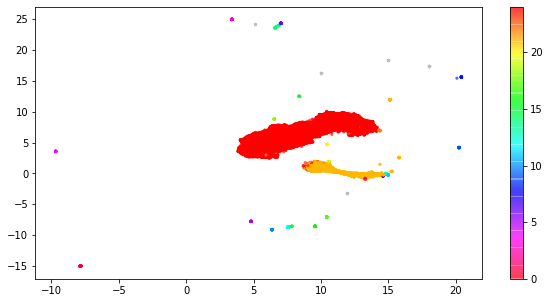

In [ ]:
# 降2維畫圖
umap_data2 = umap.UMAP(n_neighbors=100, n_components=2, min_dist=0, metric='cosine', random_state=42).fit_transform(embeddings2)
result2 = pd.DataFrame(umap_data2, columns=['x', 'y'])
result2['labels'] = cluster2.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(10, 5))
outliers = result2.loc[result2.labels == -1, :]
clustered = result2.loc[result2.labels != -1, :]

plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=5, alpha=0.3)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=5, alpha=0.5, cmap='hsv_r')
plt.colorbar()


# 橘色為再次分群後的雜訊

In [ ]:
# 以表格方式識別群集

Cluster_items2 = [] # 儲存所有群集的內容

Cluster_list2 = [i for i in cdict2] # 儲存群集


for i in Cluster_list2:
  Cluster_items_word2 = [] # 儲存各別群集的文字
  Cluster_word_common2 = [] # 儲存各別群集的文字頻率
  for j in cdict2[i].most_common(50):
    Cluster_items_word2.append(j[0])
  Cluster_items2.append(Cluster_items_word2)


Cluster_word_dict2 = dict(zip(Cluster_list2, Cluster_items2))


wrd_dict2 = [] # 以字典紀錄詞頻
for i in cdict2:
  wrd_dict2.append(dict((x, y) for x, y in cdict2[i].most_common(50)))
 


data_cluster2 = pd.DataFrame.from_dict(Cluster_word_dict2, orient='index').transpose()
# data_cluster2.to_excel('data_cluster.xlsx')
data_cluster2.head()

,24,21,20,7,1,12,-1,3,23,2,8,10,0,15,18,16,5,9,19,6,14,4,17,11,13,22
0,生产,生产,1958,时盘,刘长忠,志成,化学,孟庆彪,文物,陈娟,游云,纳一摄,孙忠靖,安康,撤销,任命,牛畏予,章耕辛摄,中央人民广播电台,邹健东,陈秉祥,喻惠,会议,霍生,李长,边防部队
1,群众,工人,30,棋摄,李基,治平,日本,赵成,美国,美摄,谷,建摄,王瑾,夏道,行政区域,中华人民共和国,祝君,许必华摄,转播,王旭东,陈捷,如摄,华沙,联摄,永摄,印度
2,国家,公社,25,None,禄,兴国,传真照片,孟宪全,美帝国主义,None,齐观山,于肇摄,子,国权,划归,全权大使,None,摄,节目,贾承滨,周树铭,何竟,大使级,None,吕厚民,地区
3,发展,附图片,1957,None,萧述,文成,青云,彭逢烨,台湾,None,关山,于兆摄,None,治安,设立,特命,None,姜,实况,郭伟,陈维,成摄,会谈,None,李日,印军
4,中国,社员,吉林,None,正平,介文,德意志民主共和国,宗白易,珍贵文物,None,米谷,None,None,春节,领导,职务,None,可运,各界,琪,钧,None,宣布,None,宣摄,西藏


# 分群結果驗證

In [ ]:
filt = (df2['cluster'] == 21) # 輸入欲驗證隻群集 24其他議題、21與思想傳播相關

df_test2 = df2.loc[filt, ['era', 'title', 'tfidf', 'cluster']]
pd.set_option('display.max_columns', None) # 不限顯示數量
pd.set_option('display.max_rows', None) # 

print(len(df_test2))
df_test2.head(100)

5960


,era,title,tfidf,cluster
1554,195801,明月峡——宝成路上的天险,"独无,车压,轨破,云栈迹,靖华,人行,巴山,秦岭",21
1558,195801,用红树皮做牛皮纸,"树皮,木浆,制造,水泥袋,80,20,18,产在,麻根,板纸,牛皮纸,造纸厂,稻草,天津市,...",21
1559,195801,开采黄金万两,"清原,产金,营口,建平,辽宁省,二百多两,选冶,半机械化,工业厅,淘采,七百多,手工劳动,开...",21
1563,195801,八种精密光学仪器,"精密度,试制成功,八种,光学仪器,头等,高精度,必备,弹簧,显微镜,机械制造,万分,科学研究...",21
1557,195801,长江上将添八十艘新船,"船舶,冷藏,驳船,管理局,改建,航运,水果,新建,立方公尺,长江,推轮,专运,船中,冻猪,二...",21
1547,195801,水稻插秧机,"57,插秧机,南京农业,15,中国农业科学院,送交,机械厂,生产,第一台,一百,机械化,诞生...",21
1592,195801,稻草人：“真寂寞！”,"华君武,小猫,无聊",21
1587,195801,在我们的首都（六）,"少年宫,邵宇,色彩鲜明,年青,新生,古老,红色,北京",21
1530,195801,不要抄小路,"二十多亩,小道,改道,不合理,耕地,浮山县,走近路,道路,东晓,农业社,禾苗,抄近路,全社,...",21
1461,195801,在群力农场初级中学,"学生,教师,两不误,上右,李轩惠,勤学苦练,翻犁,下右,王地康,犁耙,摸过,远景规划,文词,...",21


In [ ]:
# 轉時間格式
df2 = df2.sort_values("era", ascending='True')


era_list = set([i for i in df2['era']])
cluster_month = []
era_month = []
k = 0
for e in era_list:
  cluster_temp = []
  for i,j in zip(df2['cluster'], df2['era']):
    if j == e:
      cluster_temp.append(i)
    else:
      pass
  cluster_month.append(cluster_temp)
  era_month.append(e)
      

cluster_month_dict_list = [] # 每月群集個別數量，以字典表達，用list包覆

for i in range(len(cluster_month)):
  cluster_month_dict_list.append((dict(Counter(cluster_month[i]))))

df_cluster_month = pd.DataFrame(cluster_month_dict_list) 
df_era_month = pd.DataFrame(To_datetime(era_month), columns=['month'])

df_month2 = pd.concat([df_era_month, df_cluster_month], axis=1) # 水平合併
df_month2 = df_month2.sort_values("month", ascending='True').reset_index().fillna(0)  # 以月分遞增排序  重設index  以0填滿NAN
df_month2 = df_month2.drop(columns=['index']) #刪除原本的inex
df_month2.head()


,month,24,21,16,8,14,15,13,6,1,7,23,0,12,9,4,17,5,10,3,20,11,-1,19,2,18,22
0,1958-01-01,1107,159,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0
1,1958-02-01,947,106,0.0,1.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1958-03-01,1243,300,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1958-04-01,1196,247,1.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,4.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0
4,1958-05-01,1111,237,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0


# 重新定義概念

加入df2的群集24

In [ ]:
# 相同概念相加

# 國際問題 32*, 25*, 33*, 29*, 19*, 28*, 38*, 35*, 22*, 34*, 30*
df_1 = list(df_month['32']+df_month['25']+df_month['33']+df_month['29']+df_month['19']+df_month['28']+df_month['38']+df_month['35']+df_month['22']+df_month['34']+df_month['30'])

# 蘇聯現況 14*, 31*, 15*
df_2 = list(df_month['14']+df_month['31']+df_month['15'])

# 外交參訪 # 13?, 37*, 40*, 41*, 1*
df_3 = list(df_month['13']+df_month['37']+df_month['40']+df_month['41']+df_month['1'])

# 文學藝術 52, 43, 44, 42, 39
df_4 = list(df_month['52']+df_month['43']+df_month['44']+df_month['42']+df_month['39'])


# 大躍進政策 

# 三面紅旗政策目標
df_5 = list(df_month['16'])

# 工業與水利改革與成果
df_6 = list(df_month['46']+df_month['50'])

# 農業改革與成果
df_7 = list(df_month['36']+df_month['51']+df_month['54'])

# 社會主義建設思想思想傳播
df_8 = list(df_month['53']+df_month['47']+df_month2[21])

# 災害報導 18(病蟲害), 55(農災), 8(颱風)
df_9 = list(df_month['18']+df_month['55']+df_month['8'])

# 重大會議報告 10, 24
df_10 = list(df_month['10']+df_month['24'])



df_cluster_restack = pd.DataFrame(zip(df_month['month'], df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10), 
                                  columns = ['month', '國際問題', '蘇聯現況', '外交參訪', '文學藝術', '三面紅旗政策目標', '工業與水利改革與成果', 
                                             '農業改革與成果','社會主義建設思想', '災害報導', '重大會議報告'])

df_cluster_restack.head()


,month,國際問題,蘇聯現況,外交參訪,文學藝術,三面紅旗政策目標,工業與水利改革與成果,農業改革與成果,社會主義建設思想,災害報導,重大會議報告
0,1958-01-01,211.0,48.0,259.0,45.0,57,96.0,28.0,279,74.0,5.0
1,1958-02-01,204.0,28.0,185.0,46.0,24,77.0,22.0,207,44.0,11.0
2,1958-03-01,224.0,39.0,215.0,73.0,44,123.0,46.0,460,28.0,10.0
3,1958-04-01,234.0,43.0,259.0,71.0,34,135.0,54.0,372,27.0,2.0
4,1958-05-01,229.0,42.0,257.0,62.0,24,138.0,55.0,337,23.0,3.0


# 繪圖

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties  # 匯入FontProperties
import matplotlib as mpl
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

## 圓餅圖

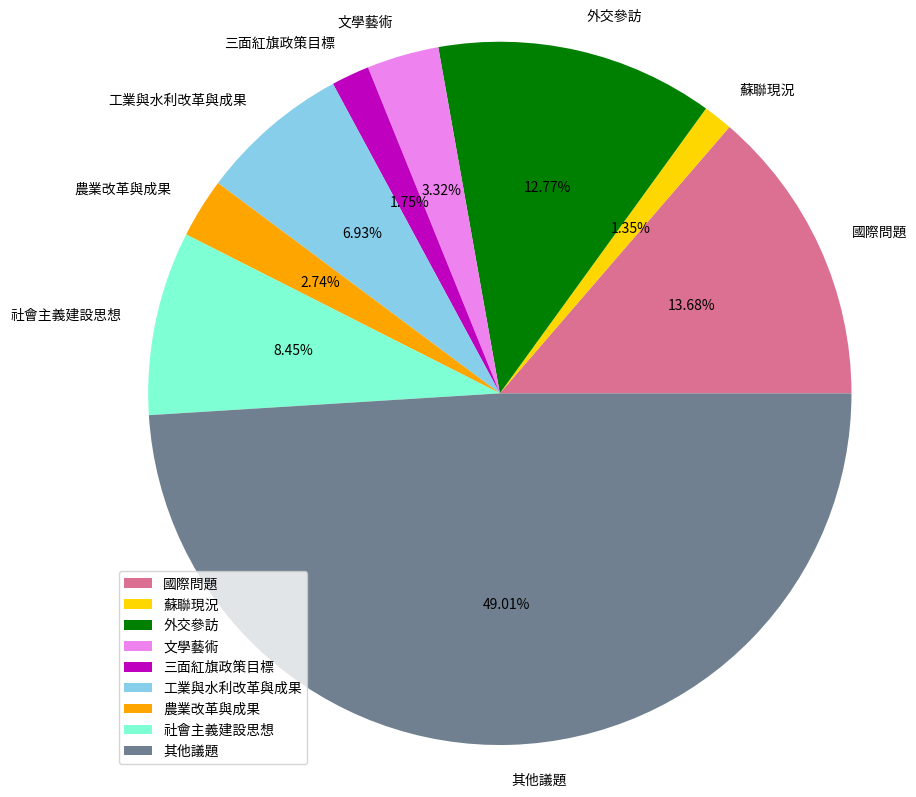

In [ ]:
others = len(df) - sum(list(df_cluster_restack.sum()))


# ref: https://www.twblogs.net/a/5c8816febd9eee35fc146439
def Pie():
     """
     繪製圓餅圖
     :return:
     """
 
     import matplotlib.pyplot as plt
 
     # 1.數據
     columns_name = list(df_cluster_restack.columns[1:-2])+['其他議題']

     place_count = list(df_cluster_restack.iloc[:, 1:-2].sum())+[others]
 
     # 2.創建畫布
     plt.figure(figsize=(10, 10), dpi=100)
 
     # 3,繪製餅圖
     colors = ['palevioletred', 'gold', 'g', 'violet', 'm','skyblue','orange', 'aquamarine', 'slategray']
     # autopct="%1.2f%%" 保留2位小數
     # shadow=True,startangle=90   是否有陰影
     plt.pie(place_count, labels=columns_name, autopct="%1.2f%%", colors=colors, shadow=False,
             startangle=0)
 
     # 顯示圖例
     plt.legend()
 
     # 爲了讓顯示的餅圖保持圓形，需要添加axis保證長寬一樣
     plt.axis('equal')
 
     # 添加標題
    #  plt.title("社論議題佔比", fontsize=15)
 
     # 中文防止亂碼
     plt.rcParams['font.sans-serif'] = ['SimHei']
     plt.rcParams['axes.unicode_minus'] = False
 
     # 4）顯示圖像
     plt.show()
     
Pie()

## 折線圖

### 折線圖（總體）

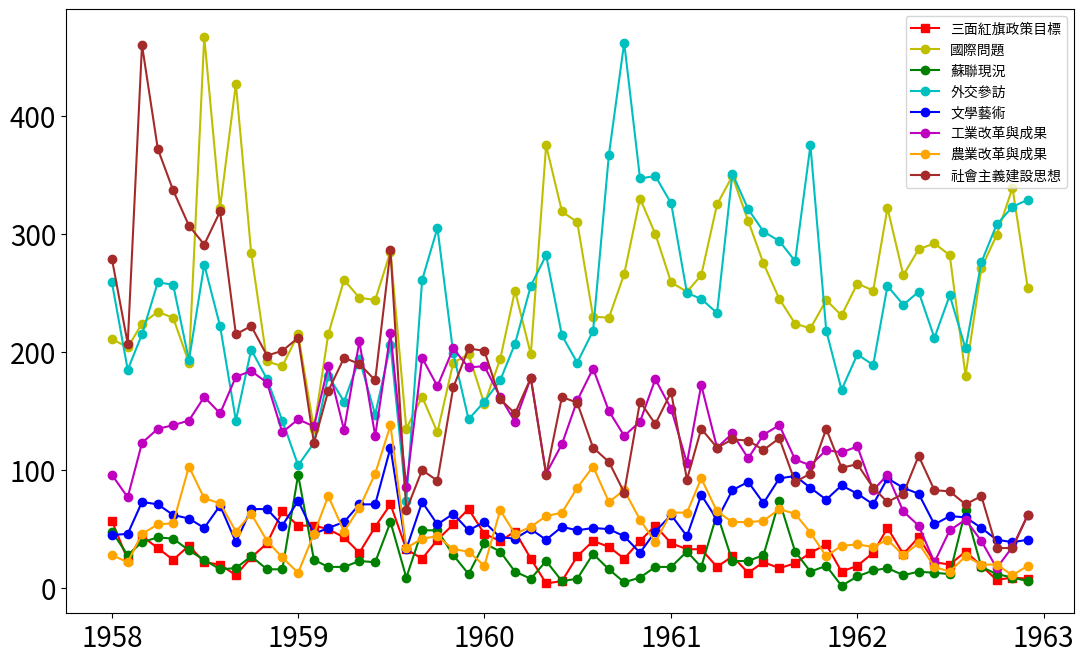

In [ ]:
# import matplotlib相關套件
# color ref: https://zhuanlan.zhihu.com/p/65220518


# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')


# 使用月份當做X軸資料

month = df_cluster_restack['month']

# 使用第一條線的資料
cluster0 = df_cluster_restack['三面紅旗政策目標']

# 使用第二條線的資料
cluster1 = df_cluster_restack['國際問題']
cluster2 = df_cluster_restack['蘇聯現況']
cluster3 = df_cluster_restack['外交參訪']
cluster4 = df_cluster_restack['文學藝術']
cluster5 = df_cluster_restack['工業與水利改革與成果']
cluster6 = df_cluster_restack['農業改革與成果']
cluster7 = df_cluster_restack['社會主義建設思想']
# cluster10 = df_cluster_restack['其他議題']

# 設定圖片大小為長15、寬10

plt.figure(figsize=(13,8),dpi=100,linewidth = 2)

font = FontProperties(fname="msjh.ttf", size=14) 
# 把資料放進來並指定對應的X軸、Y軸的資料，用方形做標記(s-)，並指定線條顏色為紅色，使用label標記線條含意

plt.plot(month,cluster0,'s-',color = 'r', label="三面紅旗政策目標")

plt.plot(month,cluster1,'o-',color = 'y', label="國際問題")

plt.plot(month,cluster2,'o-',color = 'g', label="蘇聯現況")
 
plt.plot(month,cluster3,'o-',color = 'c', label="外交參訪")

plt.plot(month,cluster4,'o-',color = 'b', label="文學藝術")

plt.plot(month,cluster5,'o-',color = 'm', label="工業改革與成果")

# plt.plot(month,cluster6,'o-',color = 'lime', label="水利改革與成果")

plt.plot(month,cluster6,'o-',color = 'orange', label="農業改革與成果")

plt.plot(month,cluster7,'o-',color = 'brown', label="社會主義建設思想")

# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離

# plt.title("標題範例", fontproperties=myfont, x=0.5, y=1.03)

# 设置刻度字体大小

plt.xticks(fontsize=20)

plt.yticks(fontsize=20)

# 標示x軸(labelpad代表與圖片的距離)

# plt.xlabel("month", fontsize=30, labelpad = 15)

# 標示y軸(labelpad代表與圖片的距離)

# plt.ylabel("price", fontsize=30, labelpad = 20)

# 顯示出線條標記位置

plt.legend(loc = "best", fontsize=10)

# 畫出圖片

plt.show()

### 折線圖(去除與大躍進無關的報導)
  去除:國際問題、外交參訪、文學藝術

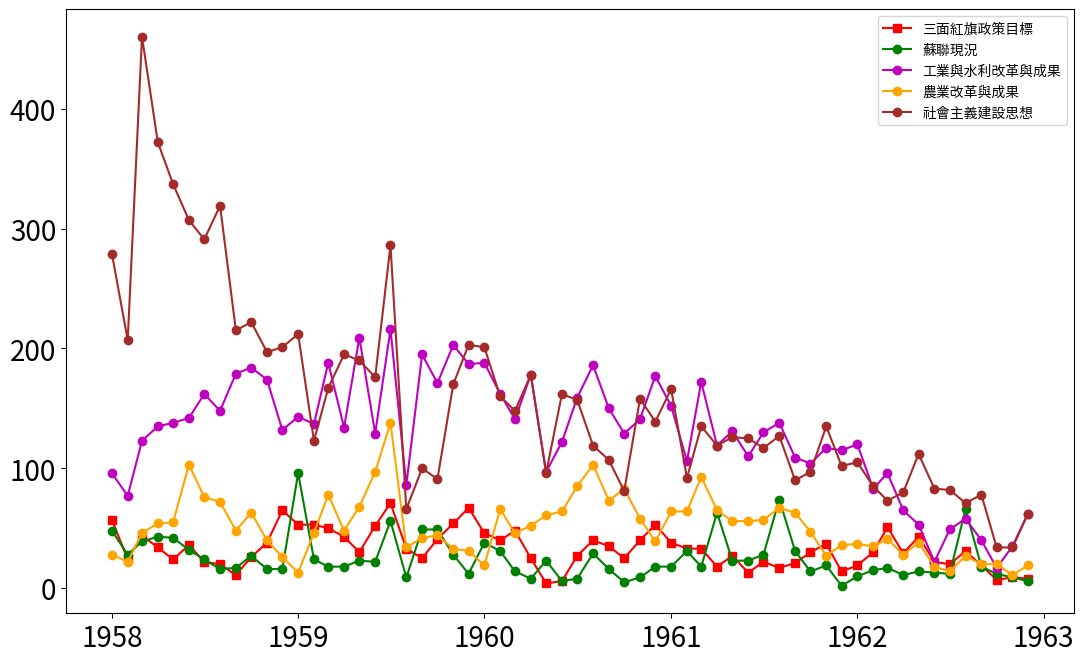

In [ ]:
# import matplotlib相關套件
# color ref: https://zhuanlan.zhihu.com/p/65220518


# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')


# 使用月份當做X軸資料

month = df_cluster_restack['month']

# 使用第一條線的資料
cluster0 = df_cluster_restack['三面紅旗政策目標']

# 使用第二條線的資料
cluster2 = df_cluster_restack['蘇聯現況']
cluster5 = df_cluster_restack['工業與水利改革與成果']
cluster6 = df_cluster_restack['農業改革與成果']
cluster7 = df_cluster_restack['社會主義建設思想']
# cluster10 = df_cluster_restack['其他議題']

# 設定圖片大小為長15、寬10

plt.figure(figsize=(13,8),dpi=100,linewidth = 2)

font = FontProperties(fname="msjh.ttf", size=14) 
# 把資料放進來並指定對應的X軸、Y軸的資料，用方形做標記(s-)，並指定線條顏色為紅色，使用label標記線條含意

plt.plot(month,cluster0,'s-',color = 'r', label="三面紅旗政策目標")

plt.plot(month,cluster2,'o-',color = 'g', label="蘇聯現況")

plt.plot(month,cluster5,'o-',color = 'm', label="工業與水利改革與成果")

# plt.plot(month,cluster6,'o-',color = 'lime', label="水利改革與成果")

plt.plot(month,cluster6,'o-',color = 'orange', label="農業改革與成果")

plt.plot(month,cluster7,'o-',color = 'brown', label="社會主義建設思想")

# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離

# plt.title("標題範例", fontproperties=myfont, x=0.5, y=1.03)

# 设置刻度字体大小

plt.xticks(fontsize=20)

plt.yticks(fontsize=20)

# 標示x軸(labelpad代表與圖片的距離)

# plt.xlabel("month", fontsize=30, labelpad = 15)

# 標示y軸(labelpad代表與圖片的距離)

# plt.ylabel("price", fontsize=30, labelpad = 20)

# 顯示出線條標記位置

plt.legend(loc = "best", fontsize=10)

# 畫出圖片

plt.show()

### 折線圖(單一類別呈現)

In [ ]:
def plot_1(cluster_name1):
    fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
    mpl.rc('font', family='Taipei Sans TC Beta')

    month = df_cluster_restack['month']

    # 使用第一條線的資料
    cluster0 = df_cluster_restack[str(cluster_name1)]

    # 設定圖片大小為長15、寬10

    plt.figure(figsize=(13,8),dpi=100,linewidth = 2)

    font = FontProperties(fname="msjh.ttf", size=14) 
    # 把資料放進來並指定對應的X軸、Y軸的資料，用方形做標記(s-)，並指定線條顏色為紅色，使用label標記線條含意

    plt.plot(month,cluster0,'s-',color = 'r', label=str(cluster_name1))
    plt.xticks(fontsize=20)

    plt.yticks(fontsize=20)

    plt.legend(loc = "best", fontsize=10)

    # 畫出圖片

    plt.show()

In [ ]:
def plot_2(cluster_name1, cluster_name2):
    fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
    mpl.rc('font', family='Taipei Sans TC Beta')

    month = df_cluster_restack['month']

    # 使用第一條線的資料
    cluster0 = df_cluster_restack[str(cluster_name1)]

    cluster1 = df_cluster_restack[str(cluster_name2)]
    # 設定圖片大小為長15、寬10

    plt.figure(figsize=(13,8),dpi=100,linewidth = 2)

    font = FontProperties(fname="msjh.ttf", size=14) 
    # 把資料放進來並指定對應的X軸、Y軸的資料，用方形做標記(s-)，並指定線條顏色為紅色，使用label標記線條含意

    plt.plot(month,cluster0,'s-',color = 'r', label=str(cluster_name1))
    plt.plot(month,cluster1,'s-',color = 'b', label=str(cluster_name2))

    plt.xticks(fontsize=20)

    plt.yticks(fontsize=20)

    plt.legend(loc = "best", fontsize=10)

    # 畫出圖片

    plt.show()

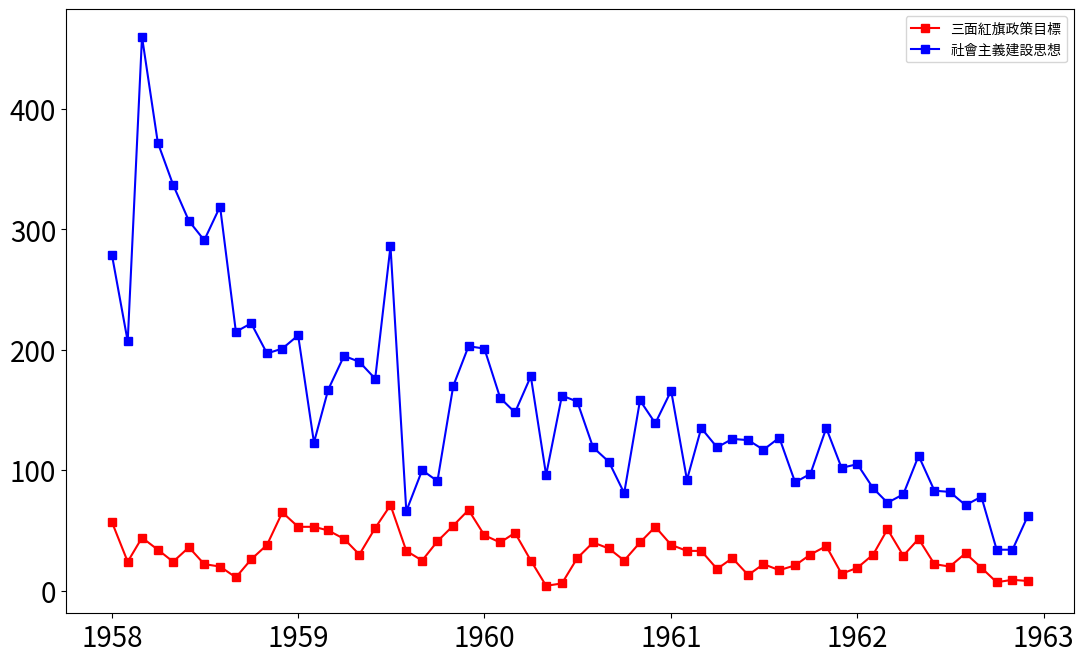

In [ ]:
plot_2('三面紅旗政策目標', '社會主義建設思想') # 政策目標與思想傳播的趨勢雷同

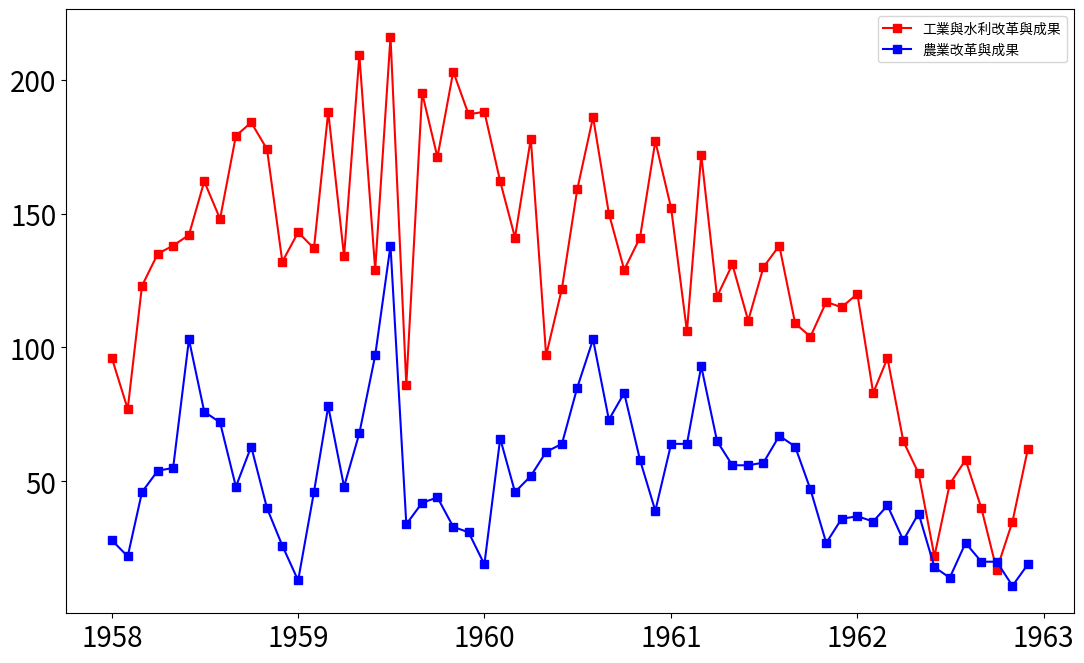

In [ ]:
plot_2('工業與水利改革與成果', '農業改革與成果') # 工業與農業的趨勢雷同

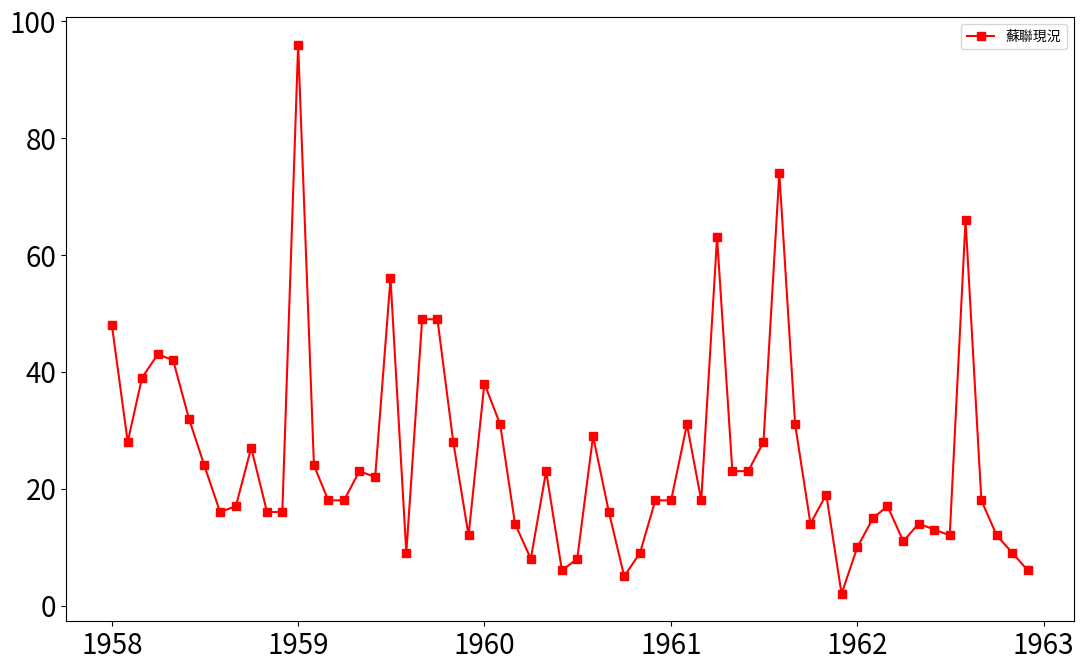

In [ ]:
plot_1('蘇聯現況')